# **Pandas**
---
###### ${Por \ Pedro\ Magalhães\ \& \ Rafaella\ Ferraz}$

## Introdução

O *pandas* é um pacote Python amplamente utilizado para manipular dados. Possui como base o pacote *numpy* que permite a manipulação de objetos *arrays* e matrizes multidimensionais, com uma vasta coleção de funções matemáticas e estatísticas. A principal diferença do *numpy* para o *pandas* está no nível de abstração. O *numpy* possui uma nível médio de abstração, enquanto o *pandas* possui um alto nível. Em outras palavras, quanto mais longe do código de máquina e mais próximo a linguagem humana um algoritmo ou uma linguagem está, mais alto é seu nível de abstração.

Vamos verificar isso com um exemplo prática?

Primeiro, vamos importar os pacotes *numpy* e *pandas*, com um *alias* (apelidos) "np" e "pd" respectivamente.

In [ ]:
import numpy as np
import pandas as pd

Agora, podemos chamar os métodos disponíveis no *numpy* e *pandas* utilizando os objetos "np" e "pd", respectivamente.

Primeiro, vamos criar um *array* com *n* zeros no *numpy* e atribulo-lo ao objeto "arr":

In [ ]:
n = 5
arr = np.zeros(n)
arr

array([0., 0., 0., 0., 0.])

Observe que um *array* com 5 zeros foi criado.

Diferente de uma lista, um *array* do *numpy* possui uma gama de funções matématicas e transformações que podem ser facilmente aplicados sobre o objeto "array".

Não iremos adentrar neste domínio, pois o nosso foco está no *pandas*, mas é importante conhecer um pouco do seu progenitor, certo?

Pois bem, sem mais enrolações, vamos criar um objeto similiar ao *arr*,  um vetor unidimensional, porém usando *pandas*. Um *array* no pandas é chamado de *Serie* e pode ser criado com o método *pandas.Series()*, no nosso caso, *pd.Series()*


In [ ]:
serie = pd.Series(arr)
serie

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

Observem que o objeto *serie* criado é mais apresentável, humanamente falando. Cada linha possui um identificador (0,1,2,...) que chamamos de *index* e um objeto *Series* possui também um tipo: *string*, *float*, *int*, etc. Isso ajuda o *pandas* a saber qual tipo de dados é esperado naquela *Series*, e consequentemente, que tipo de operações posso realizar nela. Os *index* podem ser tanto inteiros como *strings*, similares as chaves de  um objeto dicionário.

Vamos falar sobre o objeto *DataFrame*, que será bastante utilizado. Basicamente, um "Dataframe" é um conjunto de *Series*, similar a uma tabela. *DataFrames* são equivalentes as matrizes do *numpy*, porém, possui apenas duas dimensões: *index* (já citado) e *columns*.
Vamos criar um *DataFrame* utilizando 2 *Series* de tamanhos iguais a partir de 2 listas.

In [ ]:
# Criando as listas
lista1 = ["A", "C", "T", "G"]
lista2 = ["Adenina", "Citosa", "Tirosina", "Guanina"]

In [ ]:
# Criando as Series
serie1 = pd.Series(lista1)
serie1

0    A
1    C
2    T
3    G
dtype: object

In [ ]:
serie2 = pd.Series(lista2)
serie2

0     Adenina
1      Citosa
2    Tirosina
3     Guanina
dtype: object

Vejam que o tipo (*dtype*) das *Series* são objetos. Falaremos mais disso depois.

Agora vamos criar o *DataFrame*, utilizando a função pandas.DataFrame()

In [ ]:
df = pd.DataFrame([serie1, serie2])
df

,0,1,2,3
0,A,C,T,G
1,Adenina,Citosa,Tirosina,Guanina


Bom, não era muito bem isso o esperado, certo? Sem problemas, basta usamos a função *transpose()* do *DataFrame* que as coisas ficaram certas.

In [ ]:
df = df.transpose()
df

,0,1
0,A,Adenina
1,C,Citosa
2,T,Tirosina
3,G,Guanina


Perfeito!

Agora só precisamos colocar os nomes das colunas. Para isso, podemos utilizar uma lista, atribuindo a mesma ao atributo "columns" do *DataFrame*.

In [ ]:
colunas = ["sigla", "nucleotideo"]
df.columns = colunas
df

,sigla,nucleotideo
0,A,Adenina
1,C,Citosa
2,T,Tirosina
3,G,Guanina


Por fim, vamos aprendar a criar os mesmo *DataFrame* utilizando um dicionário, de uma forma mais direta.


In [ ]:
dicionario = {
    "siglas": ["A", "C", "T", "G"],
    "nucleotideos": ["Adenina", "Citosa", "Tirosina", "Guanina"]
}

In [ ]:
df = pd.DataFrame(dicionario)
df

,siglas,nucleotideos
0,A,Adenina
1,C,Citosa
2,T,Tirosina
3,G,Guanina


Comumente os dados que trabalhamos em *DataFrames* provêm de arquivos (csv, xls, etc), mas é possível criar *DataFrames* de outras fontes.

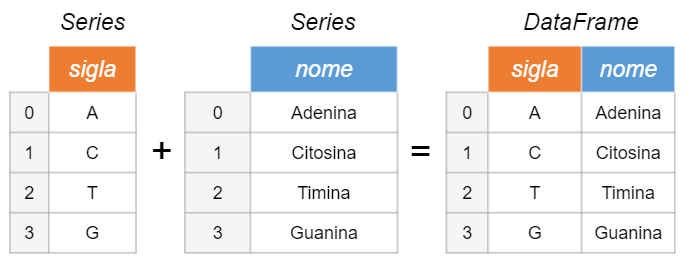

![Dataframe](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png)
Referência: https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png

### Pandas Cheat Sheet
[PDF](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

### Resumo

Vimos que o *pandas* possui 2 objetos principais: *Series* e *DataFrames*.

*Series* são similares a vetores unidimensionais enquanto *DataFrames* são similares a tabelas, ou um conjunto de *Series*.

Agora que aprendemos os objetos principais do *pandas* (*Series* e *Dataframes*), vamos aprendar mais sobre eles utilizando dados reais.

## Estudo de caso - Dispersão larval de cepas

**Análise**

A seguir, utilizando o *pandas*, faremos uma análise exploratória utilizando os dados do Dr. José Bruno Malaquias sobre dispersão larval de cepas (Resistente e Suscetível) de uma espécie de lagarta (Spodoptera frugiperda) em duas variedades de algodão (WS e NBT).


**Contextualização:**

A lagarta-do-cartucho, como é conhecida a _Spodoptera frugiperda_, é um inseto praga presente em sistemas de cultivo que possui uma grande capacidade de dispersão durante o período de cultivo e uma ampla gama de hospedeiros, incluindo o algodão.

Ao longo dos anos, vários pesquisadores têm investigado soluções para o combate desses insetos praga. Uma das alternativas que tem chamado atenção é o uso de bactérias patogênicas com potencial controle de pragas agrícolas e urbanas, entre essas a bactéria _Bacillus thuringiensis_ (Bt) tem se destacado.

A eficácia e especificidade das cepas de Bt e suas toxinas no controle de insetos praga, favoreceu a formulação de biopesticidas à base deste patógeno. Além disso, posteriormente, os genes que codificam as toxinas de ação inseticida dessas bactérias foram também isolados e incorporados em plantas, gerando plantas transgênicas Bt.

Nesse contexto, algodões Bt passaram a ser produzidos a fim de combater insetos praga, incluindo a lagarta _S. frugiperda_. Entretanto, nas últimas décadas tem ocorrido falha no controle dessa praga por esse sistema.

Uma das evidências da falha é a contaminação cruzada entre diferentes espécies de plantas ou fluxo gênico entre as variedades Bt e non-Bt, em que dependendo do grau de contaminação e se as larvas de _S. frugiperda_ se movem entre as plantas de um campo, a geração de larvas resistentes pode ser acelerada.

Uma outra evidência para sobrevivência larval em plantas Bt é o breve tempo de exposição durante o qual o inseto não ingere uma quantidade suficiente de proteínas inseticidas para causar mortalidade antes da metaformose para o estado de pupa.

Além disso, plantas modificadas geneticamente ao serem resistentes a insetos podem afetar o comportamento alimentar, locomoção e dispersão das larvas desses insetos.

**Referência:**

Malaquias, J. B., Godoy, W. A., Garcia, A. G., Ramalho, F. D. S., & Omoto, C. (2017). Larval dispersal of Spodoptera frugiperda strains on Bt cotton: a model for understanding resistance evolution and consequences for its management. Scientific reports, 7(1), 1-10.

Lendo dados de um CSV

In [ ]:
  import pandas as pd

df = pd.read_csv("https://gitlab.com/SantosRAC/python4biodata2021_practicalsessions/-/raw/master/dados/dispersao_larval_cepas.csv")
df

,Cultivar,Linhagem,Tempo,Repetição,Taxa de Dispersão,Sobrevivência
0,WS,Sus,6,1,0.5833,0.8000
1,WS,Sus,6,2,0.1429,0.9333
2,WS,Sus,6,3,0.5000,1.0000
3,WS,Sus,6,4,0.4000,0.6667
4,WS,Sus,12,1,0.5455,0.5867
...,...,...,...,...,...,...
59,NBT,Res,18,4,0.2308,0.8089
60,NBT,Res,24,1,0.0000,0.4978
61,NBT,Res,24,2,0.6667,0.2933
62,NBT,Res,24,3,0.5714,0.8089


Conforme observado acima, o *DataFrame* possui 64 linhas e 6 colunas, onde:

*   Coluna 1: Cultivar de algodão
*
      WS: algodão Bt
      NBT: algodão non-Bt

*   Coluna 2: Cepas das larvas de S. frugiperda
*
      Sus: Suscetível a ação da toxina inseticida Cry1F
      Res: Resistente a ação da toxina inseticida Cry1F


*   Coluna 3: Tempo de infestação artificial
*
      6: seis horas de exposição do algodão a ação das larvas
      12: doze horas de exposição do algodão a ação das larvas
      18: dezoito horas de exposição do algodão a ação das larvas
      24: vinte e quatro horas de exposição do algodão a ação das larvas

*   Coluna 4: Repetição (=larvas) por tratamento para avaliar a distância e velocidade percorrida pelas larvas. Unidades de medidas para cada parâmetro: distance movement (cm), mean velocity (cm/s) and continuous mobility period (s)
*
      1: medição de uma larva
      2: medição de duas larvas
      3: medição de três larvas
      4: medição de quatro larvas
      


*   Coluna 5: Taxa de dispersão

*   Coluna 6: Taxa de sobrevivência








Vamos transformar um pouco os nomes das colunas, removendo acentos e espaços e deixando tudo minúsculo.

Assim ficar mais fácil a exploração e análise dos dados.

In [ ]:
df.columns = ["cultivar", "linhagem", "tempo", "repeticao", "dispersao", "sobrevivencia"]

Agora vamos começara explorar o dados.

Listar os 20 primeiros elementos:

In [ ]:
df.head(20)

,cultivar,linhagem,tempo,repeticao,dispersao,sobrevivencia
0,WS,Sus,6,1,0.5833,0.8000
1,WS,Sus,6,2,0.1429,0.9333
2,WS,Sus,6,3,0.5000,1.0000
3,WS,Sus,6,4,0.4000,0.6667
4,WS,Sus,12,1,0.5455,0.5867
5,WS,Sus,12,2,0.5556,0.5600
6,WS,Sus,12,3,0.5385,0.9244
7,WS,Sus,12,4,0.5455,0.4889
8,WS,Sus,18,1,0.7143,0.3422
9,WS,Sus,18,2,0.5455,0.4400


Listas os 20 últimos:

In [ ]:
df.tail(20)

,cultivar,linhagem,tempo,repeticao,dispersao,sobrevivencia
44,WS,Res,24,1,0.1538,0.5778
45,WS,Res,24,2,0.0000,0.4000
46,WS,Res,24,3,0.0000,0.4400
47,WS,Res,24,4,0.5556,0.5200
48,NBT,Res,6,1,0.2308,0.8667
49,NBT,Res,6,2,0.3846,0.8667
50,NBT,Res,6,3,0.5000,0.5333
51,NBT,Res,6,4,0.4167,0.8000
52,NBT,Res,12,1,0.3333,0.6933
53,NBT,Res,12,2,0.2727,0.6356


Agora, vamos aprender um pouco como selecionar e filtrar os dados.

Selecionar uma coluna como uma *Serie*:

In [ ]:
serie_cultivar = df["cultivar"]
serie_cultivar

0      WS
1      WS
2      WS
3      WS
4      WS
     ... 
59    NBT
60    NBT
61    NBT
62    NBT
63    NBT
Name: cultivar, Length: 64, dtype: object

Selecionar uma coluna como um *DataFrame*:

In [ ]:
df_cultivar = df[["cultivar"]]
df_cultivar

,cultivar
0,WS
1,WS
2,WS
3,WS
4,WS
...,...
59,NBT
60,NBT
61,NBT
62,NBT


Selecionar múltiplas colunas:

In [ ]:
df_cultivar = df[["cultivar","linhagem", "tempo"]]
df_cultivar

,cultivar,linhagem,tempo
0,WS,Sus,6
1,WS,Sus,6
2,WS,Sus,6
3,WS,Sus,6
4,WS,Sus,12
...,...,...,...
59,NBT,Res,18
60,NBT,Res,24
61,NBT,Res,24
62,NBT,Res,24


Agora vamos selecionar diferentes linhas, a partir de um critério.

Somente as lagartas cultivadas com o algodão 'WS':

In [ ]:
df_WS = df[df["cultivar"] == "WS"]
df_WS

,cultivar,linhagem,tempo,repeticao,dispersao,sobrevivencia
0,WS,Sus,6,1,0.5833,0.8000
1,WS,Sus,6,2,0.1429,0.9333
2,WS,Sus,6,3,0.5000,1.0000
3,WS,Sus,6,4,0.4000,0.6667
4,WS,Sus,12,1,0.5455,0.5867
5,WS,Sus,12,2,0.5556,0.5600
6,WS,Sus,12,3,0.5385,0.9244
7,WS,Sus,12,4,0.5455,0.4889
8,WS,Sus,18,1,0.7143,0.3422
9,WS,Sus,18,2,0.5455,0.4400


Somente as lagartas cultivadas no algodão NBT



In [ ]:
df_NBT = df[df["cultivar"] == "NBT"]
df_NBT

,cultivar,linhagem,tempo,repeticao,dispersao,sobrevivencia
16,NBT,Sus,6,1,0.0000,0.8667
17,NBT,Sus,6,2,0.5000,0.9333
18,NBT,Sus,6,3,0.1250,1.0000
19,NBT,Sus,6,4,0.5625,1.0000
20,NBT,Sus,12,1,0.2308,0.7511
21,NBT,Sus,12,2,0.2308,0.8089
22,NBT,Sus,12,3,0.1333,1.0000
23,NBT,Sus,12,4,0.5000,0.4000
24,NBT,Sus,18,1,0.6429,0.8089
25,NBT,Sus,18,2,0.9000,0.5778


Quais os tipos de algodão (coluna "Cultivar") e suas quantidades?

---



In [ ]:
df["cultivar"].value_counts()

WS     32
NBT    32
Name: cultivar, dtype: int64

E quanto a "Linhagem"?

---



In [ ]:
df["linhagem"].value_counts()

Res    32
Sus    32
Name: linhagem, dtype: int64

Vamos analisar se há uma correlação (Pearson) entre os valores quantitativos.

In [ ]:
correlacao = df.corr()
correlacao

,tempo,repeticao,dispersao,sobrevivencia
tempo,1.000000,0.000000,0.089077,-0.593282
repeticao,0.000000,1.000000,0.102283,-0.029663
dispersao,0.089077,0.102283,1.000000,-0.281950
sobrevivencia,-0.593282,-0.029663,-0.281950,1.000000


Qual a correlação entre os valores quantitativos (Tempo, Repetição, Taxa de Dispersão, Sobrevivência)

In [ ]:
correlacao.style.background_gradient(cmap='coolwarm')

,tempo,repeticao,dispersao,sobrevivencia
tempo,1.000000,0.000000,0.089077,-0.593282
repeticao,0.000000,1.000000,0.102283,-0.029663
dispersao,0.089077,0.102283,1.000000,-0.281950
sobrevivencia,-0.593282,-0.029663,-0.281950,1.000000


E como adicionar os valores categóricos ("Cultivar" e "Linhagem") na correlação?

In [ ]:
df_dummy = pd.get_dummies(df)
df_dummy

,tempo,repeticao,dispersao,sobrevivencia,cultivar_NBT,cultivar_WS,linhagem_Res,linhagem_Sus
0,6,1,0.5833,0.8000,0,1,0,1
1,6,2,0.1429,0.9333,0,1,0,1
2,6,3,0.5000,1.0000,0,1,0,1
3,6,4,0.4000,0.6667,0,1,0,1
4,12,1,0.5455,0.5867,0,1,0,1
...,...,...,...,...,...,...,...,...
59,18,4,0.2308,0.8089,1,0,1,0
60,24,1,0.0000,0.4978,1,0,1,0
61,24,2,0.6667,0.2933,1,0,1,0
62,24,3,0.5714,0.8089,1,0,1,0


In [ ]:
correlacao_todos = df_dummy.corr()


Vamos analisar novamente as correlações:

In [ ]:
  correlacao_todos.style.background_gradient(cmap='coolwarm')

,tempo,repeticao,dispersao,sobrevivencia,cultivar_NBT,cultivar_WS,linhagem_Res,linhagem_Sus
tempo,1.000000,0.000000,0.089077,-0.593282,0.000000,0.000000,0.000000,0.000000
repeticao,0.000000,1.000000,0.102283,-0.029663,0.000000,0.000000,0.000000,0.000000
dispersao,0.089077,0.102283,1.000000,-0.281950,-0.163229,0.163229,-0.419506,0.419506
sobrevivencia,-0.593282,-0.029663,-0.281950,1.000000,0.294917,-0.294917,-0.034762,0.034762
cultivar_NBT,0.000000,0.000000,-0.163229,0.294917,1.000000,-1.000000,0.000000,0.000000
cultivar_WS,0.000000,0.000000,0.163229,-0.294917,-1.000000,1.000000,0.000000,0.000000
linhagem_Res,0.000000,0.000000,-0.419506,-0.034762,0.000000,0.000000,1.000000,-1.000000
linhagem_Sus,0.000000,0.000000,0.419506,0.034762,0.000000,0.000000,-1.000000,1.000000


Agora vamos aprender a filtrar os dados.

Vamos separar somente os dados onde foi utilizado cepas suscetíveis a ação do inseticida:

In [ ]:
df_suscetiveis = df[df["linhagem"] == "sus"]
df_suscetiveis

,cultivar,linhagem,tempo,repeticao,dispersao,sobrevivencia


Ué, o que aconteceu? Não veio nada... :(

Lembre-se, Python é sensível ao caso, ou seja, há diferença entre letras maiúsculas e minúsculas.

A linhagem "Sus" começa com letra maiúscula. Vamos tentar novamente:

In [ ]:
df_sus = df[df["linhagem"] == "Sus"]
df_sus

,cultivar,linhagem,tempo,repeticao,dispersao,sobrevivencia
0,WS,Sus,6,1,0.5833,0.8000
1,WS,Sus,6,2,0.1429,0.9333
2,WS,Sus,6,3,0.5000,1.0000
3,WS,Sus,6,4,0.4000,0.6667
4,WS,Sus,12,1,0.5455,0.5867
5,WS,Sus,12,2,0.5556,0.5600
6,WS,Sus,12,3,0.5385,0.9244
7,WS,Sus,12,4,0.5455,0.4889
8,WS,Sus,18,1,0.7143,0.3422
9,WS,Sus,18,2,0.5455,0.4400


Agora sim, vamos separar agora as cepas resistentes:

In [ ]:
df_res = df[df["linhagem"] == "Res"]
df_res

,cultivar,linhagem,tempo,repeticao,dispersao,sobrevivencia
32,WS,Res,6,1,0.5556,0.6000
33,WS,Res,6,2,0.1111,0.6000
34,WS,Res,6,3,0.3571,0.9333
35,WS,Res,6,4,0.4167,0.8000
36,WS,Res,12,1,0.2308,0.5200
37,WS,Res,12,2,0.3333,0.6000
38,WS,Res,12,3,0.7500,0.2489
39,WS,Res,12,4,0.3636,0.5867
40,WS,Res,18,1,0.4000,0.5778
41,WS,Res,18,2,0.1111,0.6000


Percebam que agora temos 3 objetos distintos:


*   df
*   df_sus
*   df_res



In [ ]:
# FILTRAR POR LINHAGEM E ALGODÃO
df_sus_ws = df[(df["linhagem"] == "Sus") & (df["cultivar"] == "WS")]
# Necessário usar () por causa da ordem de precedência do operador. '&' vem primeiro do que '=='

df_sus_ws

,cultivar,linhagem,tempo,repeticao,dispersao,sobrevivencia
0,WS,Sus,6,1,0.5833,0.8000
1,WS,Sus,6,2,0.1429,0.9333
2,WS,Sus,6,3,0.5000,1.0000
3,WS,Sus,6,4,0.4000,0.6667
4,WS,Sus,12,1,0.5455,0.5867
5,WS,Sus,12,2,0.5556,0.5600
6,WS,Sus,12,3,0.5385,0.9244
7,WS,Sus,12,4,0.5455,0.4889
8,WS,Sus,18,1,0.7143,0.3422
9,WS,Sus,18,2,0.5455,0.4400


In [ ]:
# MEDIA DA TAXA DE SOBREVIVENCIA
df_sus_ws["sobrevivencia"].mean()

0.51833125

In [ ]:
 df.groupby(['linhagem']).size()

linhagem
Res    32
Sus    32
dtype: int64

Para que ver apenas uma média, se podemos ver todas ao mesmo tempo:

In [ ]:
agrupar_por = ['linhagem','cultivar']
metricas = ["dispersao", "sobrevivencia"]

df.groupby(agrupar_por)[metricas].mean()

dispersao  sobrevivencia
linhagem cultivar                          
Res      NBT        0.297744       0.641956
         WS         0.313125       0.552231
Sus      NBT        0.423881       0.708894
         WS         0.549587       0.518331

E o desvio padrão?

In [ ]:
agrupar_por = ['linhagem','cultivar']
metricas = ["dispersao", "sobrevivencia"]

df.groupby(agrupar_por)[metricas].std()

dispersao  sobrevivencia
linhagem cultivar                          
Res      NBT        0.181740       0.174304
         WS         0.207215       0.179299
Sus      NBT        0.231808       0.270118
         WS         0.160965       0.285344

Alguns métodos estatísticos das métricas (tempo, repetição, dispersão e sobrevivência)

In [ ]:
df.describe()

,tempo,repeticao,dispersao,sobrevivencia
count,64.000000,64.000000,64.000000,64.000000
mean,15.000000,2.500000,0.396084,0.605353
std,6.761234,1.126872,0.217796,0.239477
min,6.000000,1.000000,0.000000,0.106700
25%,10.500000,1.750000,0.230800,0.436675
50%,15.000000,2.500000,0.400000,0.593350
75%,19.500000,3.250000,0.548025,0.808900
max,24.000000,4.000000,0.900000,1.000000


Agora vamos aprender a mesclar ou concatenar *DataFrames*

Vamos começar concatendo (empilhando) *DataFrame*

Para isso, vamos criar linhas sintéticas (fictícias)

In [ ]:
rows = [
            ["WS", "Sus", 12, 5, 0.70, 0.20],
            ["NBT", "Res", 13, 6, 0.66, None],
            ["WS", "Sus", None, 7, 0.64, 0.47],
            ["NBT", "Res", 17, None,None, 0.82],
            ["NBT", "Sus", None, None, 0.34,None],
            ["WS", "Res", 17, 2, 0.71,None],
            ["NBT", "Res", 13, None, 0.45,None],
            ["WS", "Sus", 18, 4, 0.10,None],
            [None, None, 11, 7, 0.21,None],
            ["NBT", "Res", 9, None, 0.45,None],
            ["WS", None, 15, 4, 0.10, None]
]
# Lista de index para criar o DataFrame fictício. Não é obrigatório
index = [85,124,146,77,93,68,69,84]

Criamos algumas linhas com valores nulos (None) para que possamos mais tarde aplicar funções utéis para este contexto.

In [ ]:
# Criando num novo DataFrame
df_fic = pd.DataFrame(rows, index=index, columns=df.columns)

# Concatenando os DataFrames df e df_fic
df_concat = pd.concat([df, df_fic])

ValueError: ignored

Agora vamos juntar 2 DataFrames a partir de um coluna chave.

In [ ]:
# Criando uma nova coluna (consumo) com valores aleatórios
import numpy as np

consumo = np.random.rand(len(df_concat. index))
df_consumo = pd.DataFrame(consumo, columns=["consumo"])
df_consumo

NameError: ignored

In [ ]:
df_juncao = df_concat.merge(df_consumo, left_index=True, right_index=True)
df_juncao

Apenas 66 das 72 linhas se uniram pois os indices de df_concat não está ordenado

In [ ]:
df_concat.tail()

In [ ]:
# Reordenando indices com o inplace = True
df_concat.reset_index(inplace=True)
df_concat

In [ ]:
# Vamos adicionar novamente a coluna consumo
df_juncao = df_concat.merge(df_consumo, left_index=True, right_index=True)
df_juncao.drop("index", axis=1, inplace=True)
df_juncao

Como analisar a quantidade e percentual de valores nulos?

In [ ]:
qtde_nulos = df_juncao.isnull().sum()
perc_nulos = df_juncao.isnull().sum() * 100 / len(df)
print(qtde_nulos)
print()
print(perc_nulos)

Fazendo seleção de linhas, colunas baseado em suas posições

In [ ]:
# 2 primeiras colunas e 3 primeiras linhas
df_juncao.iloc[:2,:3]

In [ ]:
# 5 ultimas linhas e a segunda a quarta coluna (linhagem, tempo, repeticao)
df_juncao.iloc[-5:,1:4]

In [ ]:
# 1ª, 4ª, 7ª, 25ª linhas e 1ª, 6ª e 8ª coluna
df_juncao.iloc[[0,3,6,24], [0,5,6]]

Fazendo seleção de linhas, colunas baseado em suas posições

In [ ]:
#Criar figura e area de plot
fig = plt.figure()
#Area de plot
ax = plt.subplot()
fig, ax = plt.subplots()
#Criar boxplot para a cultivar WS
plt.boxplot(x = sobrev_WS,
            patch_artist = True,
            boxprops = dict(facecolor = 'darkblue',
            showmeans = True,
            meansprops = dict(marker = '*', markeredgecolor = 'orange', markerfacecolor = 'orange'),
            medianprops = dict(linestyle = '--')),
plt.title('Taxa de sobrevivência da cultivar WS'),
plt.ticks_params(axis = 'x',
                labbelbottom = False,
                bottom = False),
ax.spines['right'].set_visible(False),
ax.spines['top'].set(visible(False),
plt.show()

SyntaxError: ignored